<a href="https://colab.research.google.com/github/hrbolek/learning/blob/master/operanalyst/pursuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Teorie pronásledování

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16
5,5,25
6,6,36
7,7,49
8,8,64


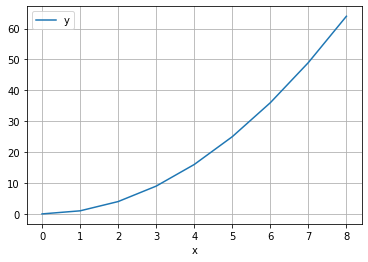

In [21]:
def displayData(data):
  display(pd.DataFrame(data))

def plotData(data, x = 0, y = 1, ax = None):
  df = pd.DataFrame(data)
  newax = None
  if ax is None:
    newax = df.plot.line(x = x, y = y)
  else:
    newax = df.plot.line(x = x, y = y, ax = ax)
  return newax

#=================#
# example of use  #
#=================#
#data = [(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36), (7, 49)]
data = [
  {'x': 0, 'y': 0}, {'x': 1, 'y': 1}, {'x': 2, 'y': 4},
  {'x': 3, 'y': 9}, {'x': 4, 'y': 16}, {'x': 5, 'y': 25},
  {'x': 6, 'y': 36}, {'x': 7, 'y': 49}, {'x': 8, 'y': 64},
]
plotData(data)
plt.grid(which='both')
displayData(data)

In [22]:
def Vector(*args):
  return np.array(args)

In [23]:
def multimap(generator, **maps):
  for item in generator:
    result = {}
    for key, func in maps.items():
      result[key] = func(item)
    yield result

In [24]:
def take(generator, count = 100):
  for index, item in enumerate(generator):
    if index == count: 
      break
    yield item

In [25]:
def select(generator, name):
  for item in generator:
    yield item[name]

In [26]:
def createRunner(position, velocity, t0 = 0, dt = 1):
  def runner():
    currentTime = t0
    currentPosition = position
    while True:
      yield {'t': currentTime, 'rpos': currentPosition}
      currentPosition = currentPosition + dt * velocity
      currentTime = currentTime + dt
  return runner

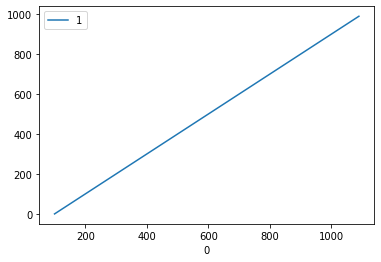

In [27]:
myRunner = createRunner(Vector(100, 0), Vector(10, 10))
results = take(select(myRunner(), 'rpos'), 100)
plotData(results)

In [49]:
def createFollower(position, v0, t0 = 0):
  def follower(runner):
    currentPosition = position
    currentTime = t0
    #currentVelocity = v0
    for state in runner:
      runnerPosition = state['rpos']
      runnerTime = state['t']

      deltaTime = runnerTime - currentTime
      headToRunner = runnerPosition - currentPosition
      headToRunnerAbs = np.linalg.norm(headToRunner)
      
      velocity = headToRunner / headToRunnerAbs
      print(velocity, v0)
      velocity = velocity * v0
      currentPosition = currentPosition + deltaTime * velocity

      yield {**state, 'fpos': currentPosition, 'fv': velocity}

      currentTime = runnerTime

  return follower

[1. 0.] 20
[0.99995099 0.0099005 ] 20
[0.999804   0.01979809] 20
[0.99955916 0.02968982] 20
[0.99921669 0.03957274] 20
[0.9987769  0.04944391] 20
[0.99824019 0.05930035] 20
[0.99760703 0.06913912] 20
[0.996878   0.07895726] 20
[0.99605377 0.08875182] 20
[0.99513508 0.09851986] 20
[0.99412278 0.10825848] 20
[0.99301778 0.11796476] 20
[0.9918211  0.12763583] 20
[0.99053383 0.13726885] 20
[0.98915714 0.14686099] 20
[0.9876923  0.15640949] 20
[0.98614063 0.16591159] 20
[0.98450356 0.1753646 ] 20
[0.98278257 0.18476585] 20
[0.98097922 0.19411276] 20
[0.97909515 0.20340276] 20
[0.97713206 0.21263335] 20
[0.9750917 0.2218021] 20
[0.97297592 0.23090662] 20
[0.97078658 0.2399446 ] 20
[0.96852564 0.24891379] 20
[0.9661951  0.25781201] 20
[0.96379699 0.26663714] 20
[0.96133341 0.27538714] 20
[0.95880649 0.28406004] 20
[0.95621842 0.29265396] 20
[0.95357139 0.30116706] 20
[0.95086766 0.30959763] 20
[0.9481095  0.31794398] 20
[0.94529921 0.32620456] 20
[0.9424391  0.33437784] 20
[0.93953153 0.34246

,t,rx,ry,fx,fy,fvx,fvy
0,0.0,100.0,0.0,0.000000,0.000000,20.000000,0.000000
1,0.1,101.0,1.0,1.999902,0.019801,19.999020,0.198010
2,0.2,102.0,2.0,3.999510,0.059397,19.996080,0.395962
3,0.3,103.0,3.0,5.998628,0.118777,19.991183,0.593796
4,0.4,104.0,4.0,7.997062,0.197922,19.984334,0.791455
...,...,...,...,...,...,...,...
145,14.5,245.0,145.0,243.013106,143.014850,14.148343,14.135925
146,14.6,246.0,146.0,244.427733,144.428651,14.146265,14.138005
147,14.7,247.0,147.0,245.842199,145.842612,14.144659,14.139611
148,14.8,248.0,148.0,247.256548,147.256690,14.143490,14.140781


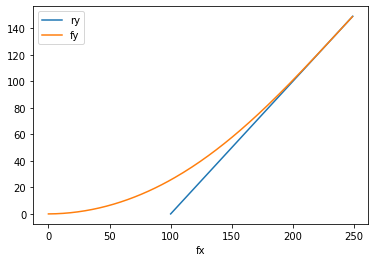

In [52]:
myRunner = createRunner(Vector(100, 0), Vector(10, 10), dt = 0.1)
myFollower = createFollower(Vector(0, 0), 20)
result = myFollower(myRunner)

maps = {
    't': lambda item: item['t'],
    'rx': lambda item: item['rpos'][0],
    'ry': lambda item: item['rpos'][1],
    'fx': lambda item: item['fpos'][0],
    'fy': lambda item: item['fpos'][1],
    'fvx': lambda item: item['fv'][0],
    'fvy': lambda item: item['fv'][1],
    }

results = list(take(multimap(myFollower(myRunner()), **maps), 150))
displayData(results)
#ax = plotData(results, 'rx', 'ry')
#ax = plotData(results, 1, 2, ax = ax)
ax = plotData(results, 'rx', 'ry')
ax = plotData(results, 'fx', 'fy', ax = ax)